In [1]:
import math
import time
from dataclasses import dataclass
from pathlib import Path
from typing import Sequence, Tuple, Union, Optional, Any
import unittest
from abc import ABC, abstractmethod
from matplotlib import pyplot as plt

import numpy as np
import torch

from torch import sigmoid

from num3 import *

ADAM

[source](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml)

RMSProp + Momemtum
Считается стадартным оптимизатором для dl задач.
В предсталвленном виде нет bias correction. (Хотя на контесте (ex4) он работал как дефолтный Adam из pytorch)

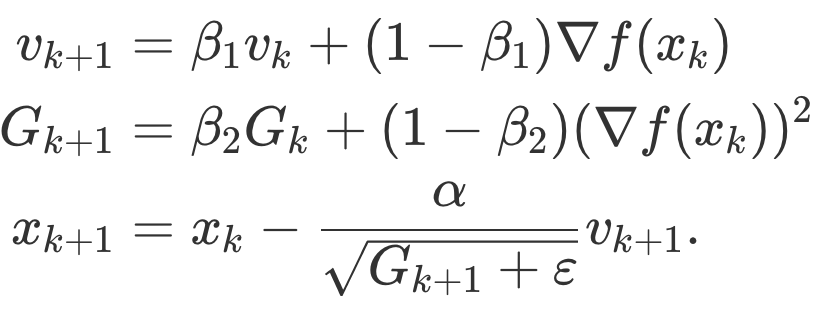

[AdamOpt] [TRAIN] nll: 0.69315, acc: 0.48880
[AdamOpt] [ TEST] nll: 0.69315, acc: 0.48900


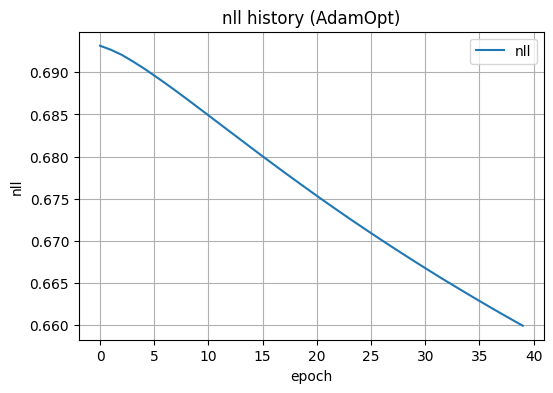

In [2]:
adam = AdamOpt()

nll_adam = run_with(adam)

ADAMW

[source](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml)
Добавляет weight decay в Adam. Когда применяется l2 регуляризация (в градиенте потом появляется: g' = g + l * x_k), то эффект от l2 может получится странным или затухающим. AdamW неявно добавляет l2 таким образом, что эффект от регуляризации становится более стабильным

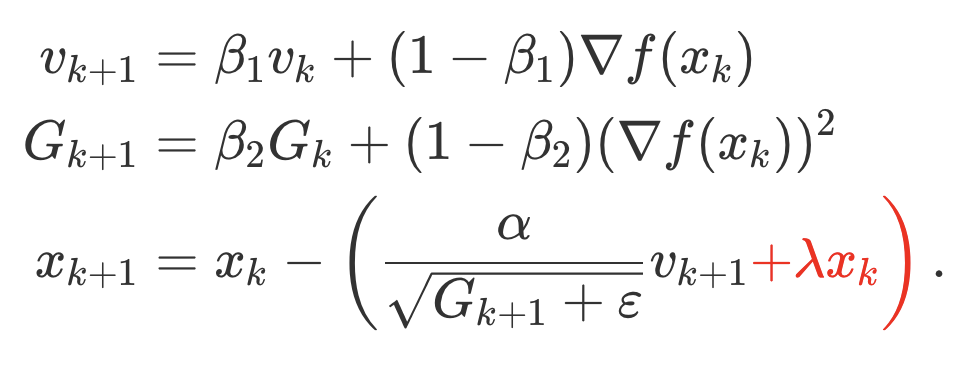

[AdamWOpt] [TRAIN] nll: 0.69315, acc: 0.49010
[AdamWOpt] [ TEST] nll: 0.69317, acc: 0.48200


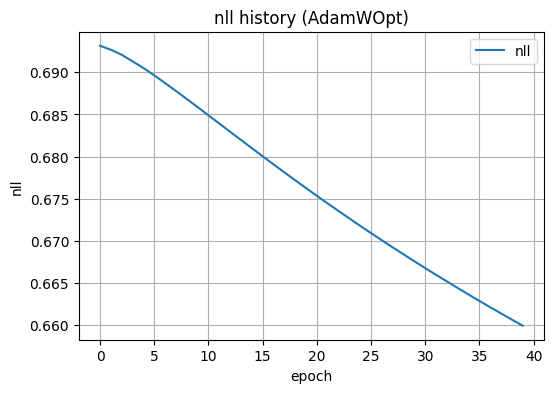

In [3]:
adamw = AdamWOpt()
nll_adamw = run_with(adamw)

Momentum

[source](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml)

Запоминаем, куда двигались в прошлый раз, и продолжаем двигаться в том же направлении + анти-градиентный спуск (-). Если градиенты шумные или меняют знак, то накопленная скорость поможет сгладить движение

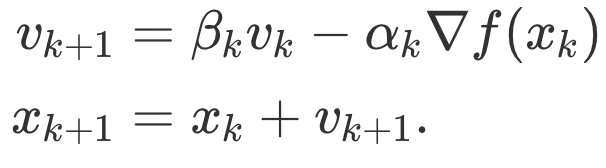

[MomentumOpt] [TRAIN] nll: 0.69315, acc: 0.19590
[MomentumOpt] [ TEST] nll: 0.69315, acc: 0.20975


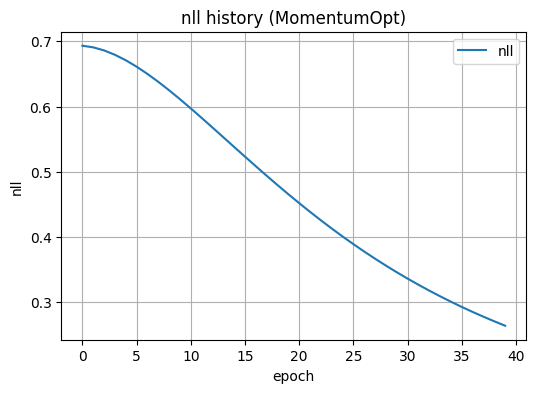

In [4]:
momentum = MomentumOpt()
nll_momentum = run_with(momentum)

NAG

[source](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml)

Здесь берем градиент в точке, куда мы бы пришли, если бы шаг делали по направлению накопленной V.

Он лучше, чем обычный Momentum

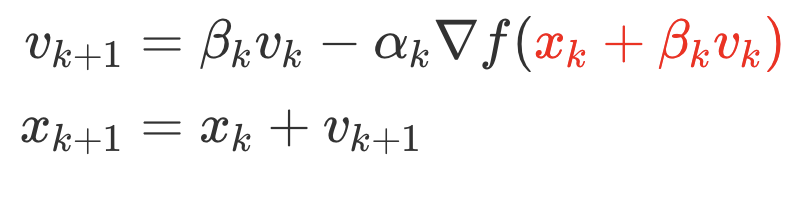

[NAGOpt] [TRAIN] nll: 0.69315, acc: 0.43450
[NAGOpt] [ TEST] nll: 0.69315, acc: 0.44775


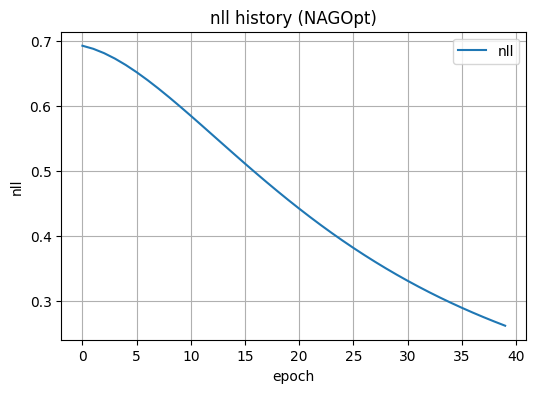

In [5]:
nag = NAGOpt()
nll_nag = run_with(nag)

ADAGRAD

[source](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml)

Когда градиент затухаем, шаги становятся меньше, но хочется избегать резких просадок. Так же: если большие – надо уменьшать шаги, но не сильно. В итоге накапливаем сумму квадратов градиентов и делим на корень из этой суммы (+eps). В итоге мы адаптируем шаги и перестаем бегать вокруг минимум. Но чаще всего  шаги все равно уменьшаются сильно

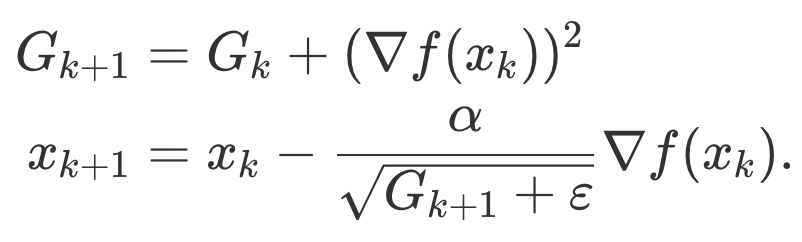

[AdagradOpt] [TRAIN] nll: 0.69316, acc: 0.50800
[AdagradOpt] [ TEST] nll: 0.69342, acc: 0.49375


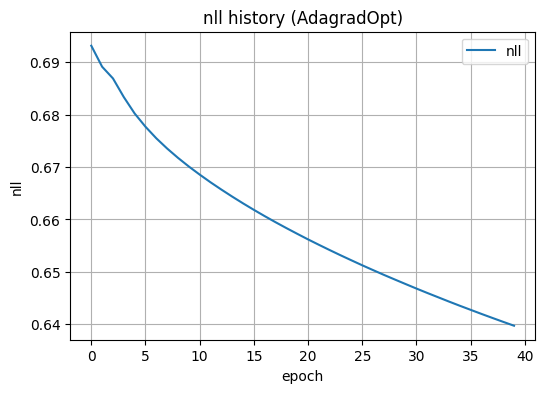

In [6]:
adagrad = AdagradOpt()
nll_adagrad = run_with(adagrad)

RMSprop

[source](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml)

Меняет adagrad: накапливаем экспоненциальное скользящее среднее (EMA) от квадратов градиентов. 
EMA: s_t = b s{t-1} + (1-b) x_t
EMA "забывает" старые значения, поэтому шаги не стремятся сильно к нулю и не остаются чувствительным к старым изменениям. 
Собственно, RMSdrop делает то же самое, но лучше работает


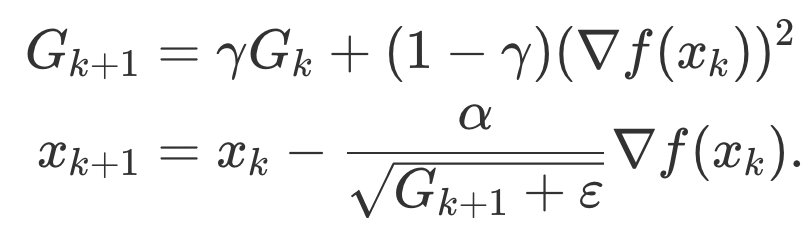

[RMSpropOpt] [TRAIN] nll: 0.69543, acc: 0.38510
[RMSpropOpt] [ TEST] nll: 0.69613, acc: 0.37000


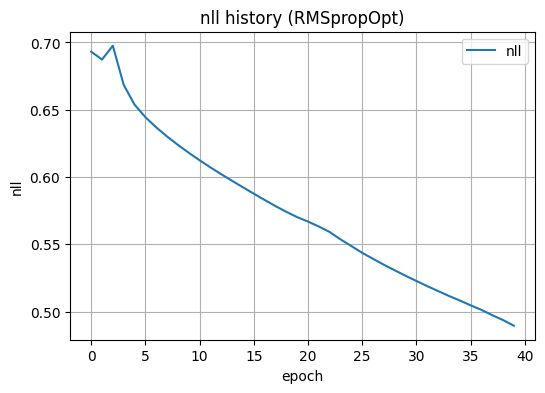

In [7]:
rmsprop = RMSpropOpt()
nll_rmsprop = run_with(rmsprop)

AdamDelta

[AdadeltaOpt] [TRAIN] nll: 0.69330, acc: 0.39930
[AdadeltaOpt] [ TEST] nll: 0.69303, acc: 0.40600


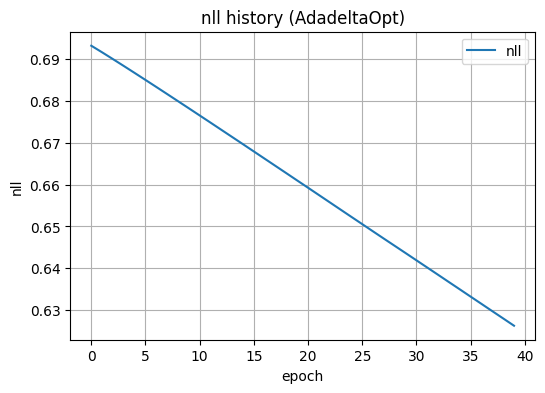

In [8]:
adamdelta = AdadeltaOpt()
nll_adamdelta = run_with(adamdelta)

Nadam


[NadamOpt] [TRAIN] nll: 0.69315, acc: 0.48780
[NadamOpt] [ TEST] nll: 0.69315, acc: 0.49250


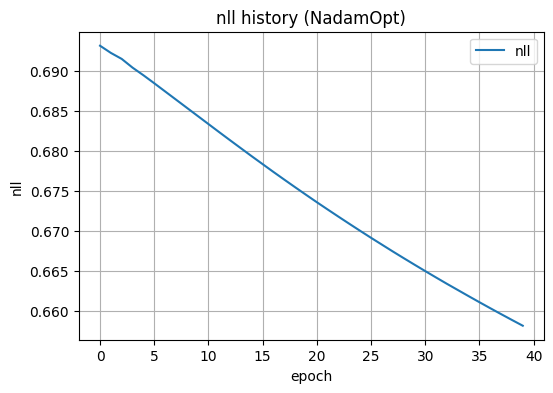

In [9]:
nadam = NadamOpt()
nll_nadam = run_with(nadam)

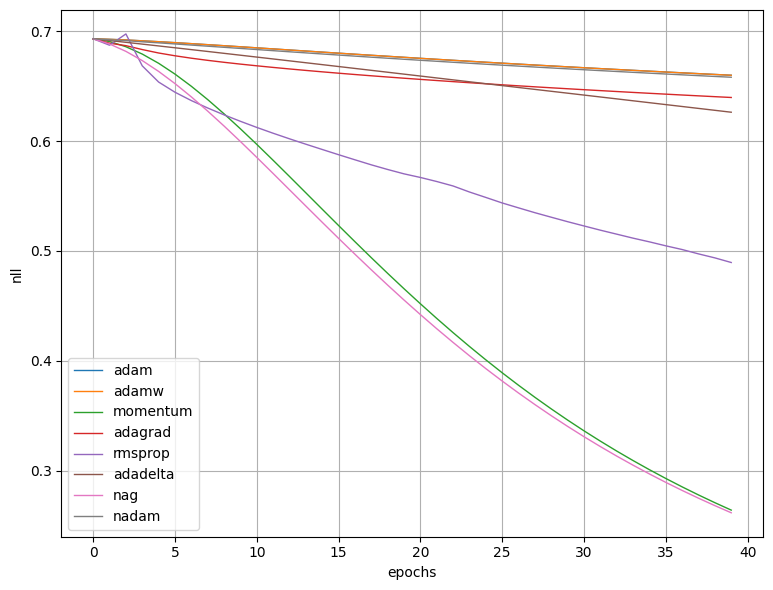

In [14]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(nll_adam['nll_history'], label="adam", linewidth=1)
plt.plot(nll_adamw['nll_history'], label="adamw", linewidth=1)
plt.plot(nll_momentum['nll_history'], label="momentum", linewidth=1)
plt.plot(nll_adagrad['nll_history'], label="adagrad", linewidth=1)
plt.plot(nll_rmsprop['nll_history'], label="rmsprop", linewidth=1)
plt.plot(nll_adamdelta['nll_history'], label="adadelta", linewidth=1)
plt.plot(nll_nag['nll_history'], label="nag", linewidth=1)
plt.plot(nll_nadam['nll_history'], label="nadam", linewidth=1)
plt.xlabel("epochs")
plt.ylabel("nll")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

В итоге получилсь, что momentum и nag лучше всех здесь